In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation , Dropout, Flatten
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
from keras.layers import  MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam, SGD
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matrix de Confusion',
                          cmap=plt.cm.Blues):

    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Original')
    plt.xlabel('Predicciones')
    
    
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap="gray")

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [24]:
dataset_facial_expression = pd.read_csv("../fer2013.csv")

In [25]:
# display the top five
dataset_facial_expression.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [26]:
# display the last five
dataset_facial_expression.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [27]:
# Summary statistics: Numeric data
dataset_facial_expression.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [28]:
type(dataset_facial_expression)

pandas.core.frame.DataFrame

In [29]:
len(dataset_facial_expression)

35887

In [30]:
dataset_facial_expression.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [31]:
# Modify a sequence in-place by shuffling its contents. 
# dataset_facial_expression = dataset_facial_expression.sample(frac=1).reset_index(drop=True)
dataset_facial_expression


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


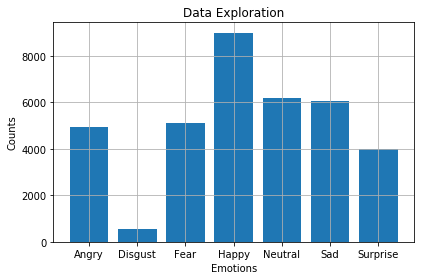

,emotion,count
3,Happy,8989
6,Neutral,6198
4,Sad,6077
2,Fear,5121
0,Angry,4953
5,Surprise,4002
1,Disgust,547


In [32]:
delais_emotion_label = ("Happy" , "Neutral", "Sad", "Fear" , "Angry", "Surprise" ,"Disgust")
delais_emotion = pd.DataFrame(data=dataset_facial_expression["emotion"].value_counts())

delais_emotion["count"] = delais_emotion["emotion"]
delais_emotion["emotion"] = delais_emotion_label
delais_emotion
%matplotlib inline
fig, ax = plt.subplots()

ax.bar(delais_emotion["emotion"], delais_emotion["count"] )
ax.set_title("Data Exploration")
ax.set_ylabel("Counts")
ax.set_xlabel("Emotions")
ax.grid()

fig.tight_layout()
plt.show()
delais_emotion


In [33]:
y = np.zeros((35887, 48, 48))
#35887
for i in range(35887):
    imagen = dataset_facial_expression["pixels"][0+i]
    imagen_list_pixel = imagen.split(" ")
    imagen_array_pixel = np.asarray(imagen_list_pixel, dtype=float)
    imagen_rezise_pixel = imagen_array_pixel.reshape(-1,48,48)    
    y[i] = y[i]+imagen_rezise_pixel[0]

  

In [34]:
train_labels = np.array(dataset_facial_expression["emotion"][:28710])
print("Train Labels = "+ str(collections.Counter(train_labels)))
  
test_labels = np.array( dataset_facial_expression["emotion"][28711:32299])  
print("Test Labels = "+ str(collections.Counter(test_labels)))  

validation_labels = np.array( dataset_facial_expression["emotion"][32300:])  
print("Validation Labels = "+ str(collections.Counter(validation_labels)))

Train Labels = Counter({3: 7215, 6: 4965, 4: 4830, 2: 4097, 0: 3996, 5: 3171, 1: 436})
Test Labels = Counter({3: 895, 4: 653, 6: 607, 2: 496, 0: 467, 5: 415, 1: 55})
Validation Labels = Counter({3: 879, 6: 626, 4: 594, 2: 528, 0: 490, 5: 415, 1: 55})


In [35]:
train_images = y[:28710]
train_labels = np.array(dataset_facial_expression["emotion"][:28710])
test_images = y[28711:32299]
test_images2= y[28711:32299]
test_labels = np.array( dataset_facial_expression["emotion"][28711:32299])
test_labels2 = np.array( dataset_facial_expression["emotion"][28711:32299])
validation_images = y[32300:]
validation_labels = np.array( dataset_facial_expression["emotion"][32300:])
 

In [36]:
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")
train_images /= 255
test_images /= 255



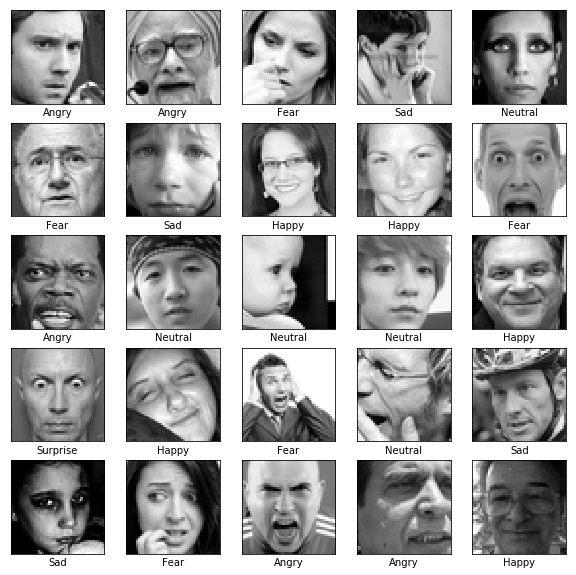

In [37]:
class_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap="gray")
    plt.xlabel(class_names[train_labels[i]])

In [ ]:


input_shape = (48, 48, 1)
batch_size = 128
num_classes = 7
epochs = 70

# convert class vectors to binary class matrices
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)
validation_labels = keras.utils.to_categorical(validation_labels, num_classes)


train_images = train_images.reshape(28710 , 2304)
test_images = test_images.reshape(3588 , 2304)


train_images = train_images.reshape(train_images.shape[0], 48, 48, 1)
test_images = test_images.reshape(test_images.shape[0], 48, 48, 1)
input_shape = (48, 48, 1)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
    
model.summary()    




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_8 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 23, 23, 64)        18496     
__________

In [ ]:
MAP_CHARACTERS = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}
opt = SGD(lr=0.009, decay=1e-6, momentum=0.9, nesterov=True)
    
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    
datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=True,  
        vertical_flip=False)  
    
datagen.fit(train_images)
    
history = model.fit_generator(datagen.flow(train_images,train_labels, batch_size=32),
                        steps_per_epoch=len(train_images) / 32, epochs=epochs,validation_data=(test_images, test_labels))




score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model.evaluate(test_images,test_labels, verbose=0)
print('\nKeras CNN #3B - accuracy:', score[1])
print('')
y_pred = model.predict(test_images)
print('\n', metrics.classification_report(np.where(test_labels > 0)[1], np.argmax(y_pred, axis=1), target_names=list(MAP_CHARACTERS.values())), sep='') 
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 

Epoch 1/70
 89/897 [=>............................] - ETA: 59:28 - loss: 1.8432 - acc: 0.2445  

In [ ]:
plt.subplot(1,1,1)
plot_acc(history)
plt.subplot(1,1,1)
plot_loss(history)

In [ ]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(MAP_CHARACTERS.values()))  

In [ ]:
model.save("/content/gdrive/My Drive/Colab Notebooks/model.h5")
model.save_weights('/content/gdrive/My Drive/Colab Notebooks/my_model_weights.h5')

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred, test_labels2, test_images2)